In [1]:
!pip install ultralytics
import cv2
from ultralytics import YOLO

In [2]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="IZLYYhdgDU9nqwva0IMO") #Enter your API Key from Roboflow
project = rf.workspace("team-roboflow").project("blood-cell-detection-1ekwu")
version = project.version(3)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [3]:
model = YOLO('yolov10n.pt')

In [5]:
!yolo task=detect mode=train epochs=25 batch=32 plots=True \
data = "/content/Blood-Cell-Detection-3/data.yaml"

Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Blood-Cell-Detection-3/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots

In [9]:
from ultralytics import YOLO

# model_path = "/content/runs/detect/train/weights/best.pt"
# model = YOLO(model_path)
model = YOLO("best.pt")
model(source="/content/Blood-Cell-Detection-3/valid/images", conf=0.25, save=True)



image 1/73 /content/Blood-Cell-Detection-3/valid/images/BloodImage_00000_jpg.rf.b9b54ee242858a8aa6282ee25f3c06d0.jpg: 640x640 20 RBCs, 1 WBC, 15.2ms
image 2/73 /content/Blood-Cell-Detection-3/valid/images/BloodImage_00004_jpg.rf.32f80737b874b0728582d77e7c409dd5.jpg: 640x640 14 RBCs, 1 WBC, 8.3ms
image 3/73 /content/Blood-Cell-Detection-3/valid/images/BloodImage_00012_jpg.rf.c13d42e1d82ce2884cb53e803eef77c2.jpg: 640x640 2 Plateletss, 18 RBCs, 1 WBC, 8.0ms
image 4/73 /content/Blood-Cell-Detection-3/valid/images/BloodImage_00017_jpg.rf.4cfec76b2314dcd5ec636e88022a15c4.jpg: 640x640 1 Platelets, 21 RBCs, 1 WBC, 8.0ms
image 5/73 /content/Blood-Cell-Detection-3/valid/images/BloodImage_00021_jpg.rf.958b85e69293875ea481e8913fd7f93d.jpg: 640x640 2 Plateletss, 16 RBCs, 1 WBC, 7.9ms
image 6/73 /content/Blood-Cell-Detection-3/valid/images/BloodImage_00026_jpg.rf.d333bd592474ebab9260e51498f1f9c2.jpg: 640x640 23 RBCs, 1 WBC, 8.5ms
image 7/73 /content/Blood-Cell-Detection-3/valid/images/BloodImage_00

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Platelets', 1: 'RBC', 2: 'WBC'}
 obb: None
 orig_img: array([[[137, 154, 173],
         [137, 154, 173],
         [140, 154, 173],
         ...,
         [200, 197, 189],
         [199, 196, 188],
         [197, 194, 186]],
 
        [[137, 154, 173],
         [139, 154, 173],
         [140, 154, 173],
         ...,
         [200, 197, 189],
         [198, 195, 187],
         [197, 194, 186]],
 
        [[139, 155, 172],
         [139, 155, 172],
         [140, 154, 172],
         ...,
         [200, 197, 189],
         [198, 195, 187],
         [196, 193, 185]],
 
        ...,
 
        [[199, 204, 203],
         [196, 200, 201],
         [191, 194, 198],
         ...,
         [177, 126, 164],
         [183, 127, 168],
         [187, 129, 170]],
 
        [[202, 204, 205],
         [197, 199, 200],
         [190, 191, 195],
         

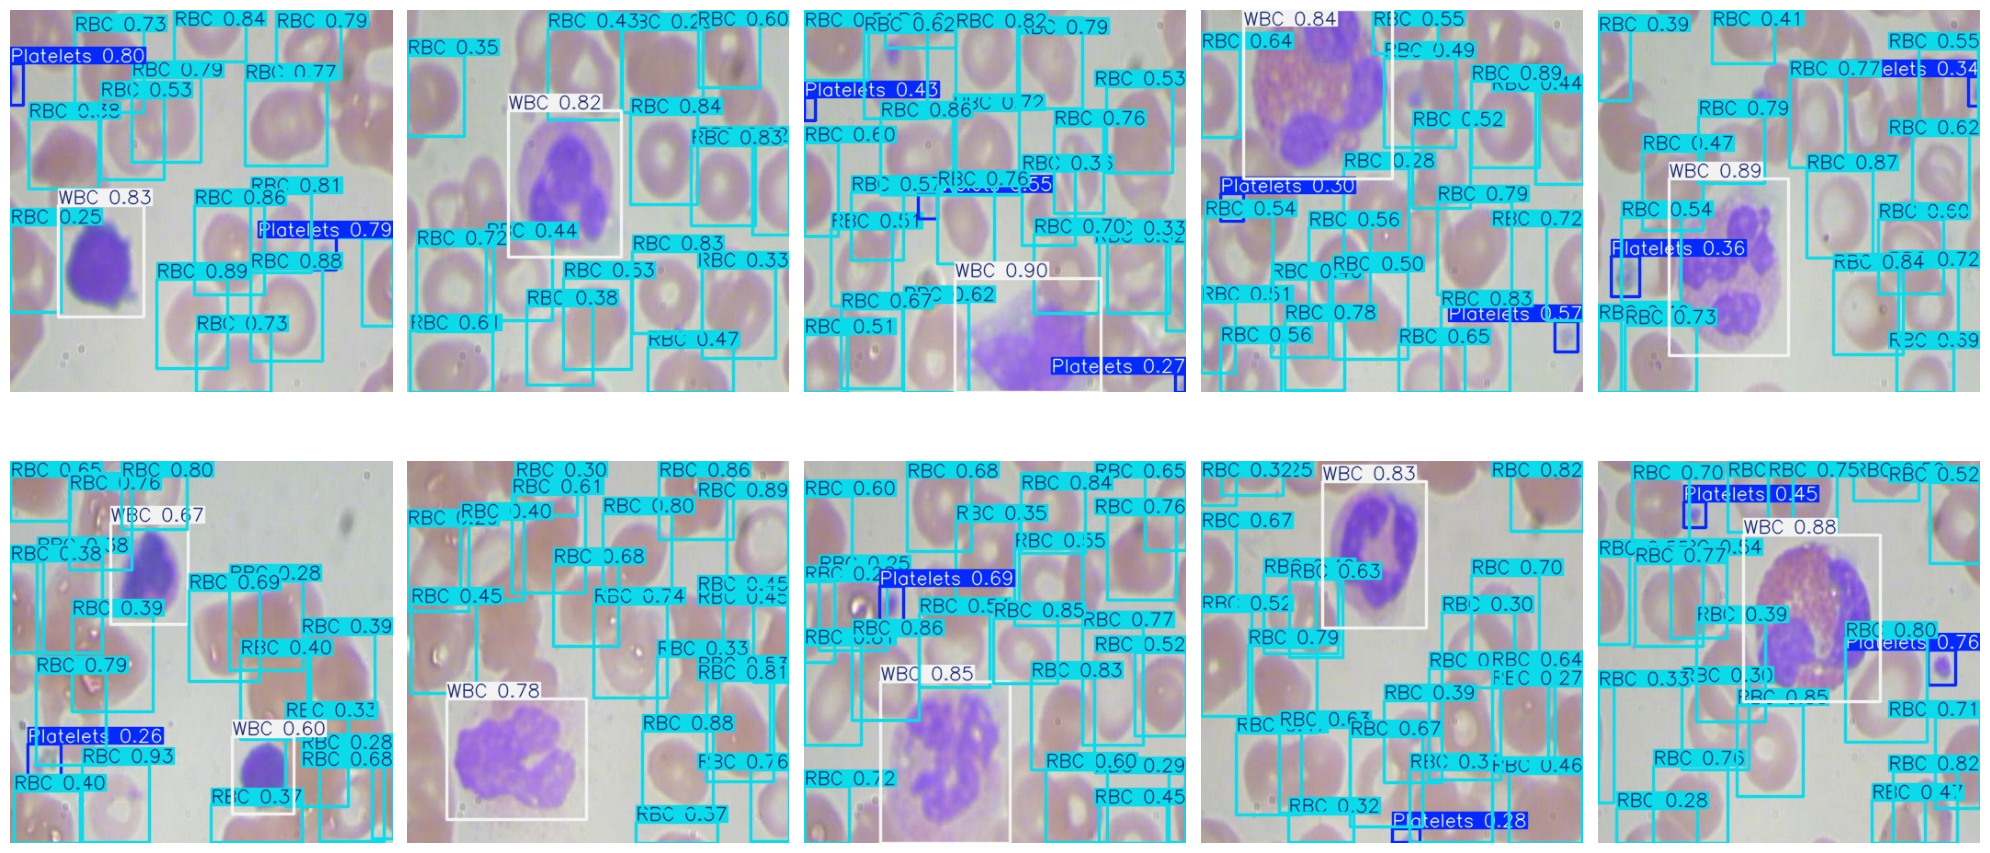

In [10]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to your YOLO prediction images
images = glob.glob("/content/runs/detect/predict2/*.jpg")

# Display first 10 images
images_to_display = images[:10]

fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for i, ax in enumerate(axes.flat):
    if i < len(images_to_display):
        img = mpimg.imread(images_to_display[i])
        ax.imshow(img)
        ax.axis("off")
    else:
        ax.axis("off")

plt.tight_layout()
plt.show()



image 1/1 /content/Blood-Cell-Detection-3/valid/images/BloodImage_00000_jpg.rf.b9b54ee242858a8aa6282ee25f3c06d0.jpg: 640x640 20 RBCs, 1 WBC, 11.1ms
Speed: 3.7ms preprocess, 11.1ms inference, 9.3ms postprocess per image at shape (1, 3, 640, 640)
RBC: 20, WBC: 1


array([[[173, 154, 137],
        [173, 154, 137],
        [173, 154, 140],
        ...,
        [189, 197, 200],
        [188, 196, 199],
        [186, 194, 197]],

       [[173, 154, 137],
        [173, 154, 139],
        [173, 154, 140],
        ...,
        [189, 197, 200],
        [187, 195, 198],
        [186, 194, 197]],

       [[172, 155, 139],
        [172, 155, 139],
        [172, 154, 140],
        ...,
        [189, 197, 200],
        [187, 195, 198],
        [185, 193, 196]],

       ...,

       [[ 11, 219, 235],
        [ 11, 219, 235],
        [125, 204, 208],
        ...,
        [164, 126, 177],
        [168, 127, 183],
        [170, 129, 187]],

       [[ 11, 219, 235],
        [ 11, 219, 235],
        [ 11, 219, 235],
        ...,
        [165, 125, 178],
        [168, 124, 183],
        [169, 125, 186]],

       [[ 11, 219, 235],
        [ 11, 219, 235],
        [ 11, 219, 235],
        ...,
        [165, 125, 178],
        [167, 123, 184],
        [168, 124, 187]]], dtype=uint8)
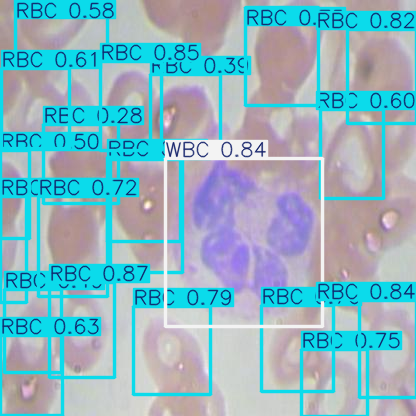

In [12]:
from collections import Counter

# Run inference on a single image
result = model.predict(source='/content/Blood-Cell-Detection-3/valid/images/BloodImage_00000_jpg.rf.b9b54ee242858a8aa6282ee25f3c06d0.jpg',imgsz=640,conf=0.25)
annotated_img = result[0].plot()

# Extract detections
detections = result[0].boxes.data

# Convert class IDs → class names
class_names = [model.names[int(cls)] for cls in detections[:, 5]]

# Count occurrences of each class
count = Counter(class_names)

# Format result string
detection_str = ', '.join([f"{name}: {count}" for name, count in count.items()])

print(detection_str)

annotated_img[:, :, ::-1]


In [20]:
%%writefile app.py

import streamlit as st
import cv2
import tempfile
import numpy as np
from ultralytics import YOLO
from collections import Counter

# ===========================
# Load Model
# ===========================
model = YOLO("/content/runs/detect/train/weights/best.pt")

# ===========================
# Helper Function
# ===========================
def detect(image):
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    result = model.predict(source=img_rgb, imgsz=640, conf=0.25)

    annotated = result[0].plot()
    detections = result[0].boxes.data

    class_names = [model.names[int(cls)] for cls in detections[:, 5]]
    count = Counter(class_names)

    detection_str = ", ".join([f"{k}: {v}" for k, v in count.items()])
    annotated = annotated[:, :, ::-1]

    return annotated, detection_str


# ===========================
# Streamlit UI
# ===========================
st.title("🩸 Blood Cell Detection & Counting (YOLOv10)")
st.write("Upload an image or video, or use webcam for real-time detection.")

conf_threshold = st.slider("Confidence Threshold:", 0.0, 1.0, 0.25, 0.05)

option = st.radio("Choose Input Source:", ["Upload Image", "Upload Video", "Webcam"])


# ===========================
# IMAGE UPLOAD
# ===========================
if option == "Upload Image":
    uploaded_image = st.file_uploader("Upload image", type=["jpg", "jpeg", "png"])

    if uploaded_image is not None:
        image = np.array(cv2.imdecode(np.frombuffer(uploaded_image.read(), np.uint8), cv2.IMREAD_COLOR))
        annotated, count_str = detect(image)

        st.image(annotated, caption="Annotated Output", use_column_width=True)
        st.success("Detection Counts: " + count_str)


# ===========================
# VIDEO UPLOAD
# ===========================
elif option == "Upload Video":
    uploaded_video = st.file_uploader("Upload video", type=["mp4", "mov", "avi"])

    if uploaded_video is not None:
        tfile = tempfile.NamedTemporaryFile(delete=False)
        tfile.write(uploaded_video.read())

        cap = cv2.VideoCapture(tfile.name)

        stframe = st.empty()

        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            annotated, count_str = detect(frame)
            stframe.image(annotated, channels="BGR")

        cap.release()


# ===========================
# WEBCAM MODE
# ===========================
elif option == "Webcam":
    st.write("Turn on webcam and start detection.")

    cam = cv2.VideoCapture(0)
    stframe = st.empty()

    while True:
        ret, frame = cam.read()
        if not ret:
            break

        annotated, count_str = detect(frame)

        stframe.image(annotated, channels="BGR")



Writing app.py


In [21]:
!streamlit run app.py --server.port 8080 --server.address 0.0.0.0


/bin/bash: line 1: streamlit: command not found


In [22]:
!pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 102.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 136.6 MB/s eta 0:00:00


In [23]:
!pip install pyngrok


In [24]:
from pyngrok import ngrok
ngrok.set_auth_token("36715KWGo9LI9z3II2GhxsnA6bT_4miW3aRKDN7gNn2R4So7M")


In [25]:
public_url = ngrok.connect(8501)
public_url


<NgrokTunnel: "https://bruce-presuppurative-noticeably.ngrok-free.dev" -> "http://localhost:8501">

In [28]:
!streamlit run app.py --server.port 8501 --server.address 0.0.0.0 &>/dev/null&
